In [1]:
import shutil

def copy_directory(src_dir, dst_dir):
    try:
        shutil.copytree(src_dir, dst_dir)
        print(f"Direktori {src_dir} berhasil disalin ke {dst_dir}.")
    except shutil.Error as e:
        print(f"Kesalahan saat menyalin direktori: {e}")
    except OSError as e:
        print(f"Kesalahan sistem: {e}")


src_directory = '/kaggle/input/cacao-diseases/cacao_diseases'
dst_directory = '/kaggle/working/cocoa_diseases'

copy_directory(src_directory, dst_directory)

Direktori /kaggle/input/cacao-diseases/cacao_diseases berhasil disalin ke /kaggle/working/cocoa_diseases.


In [3]:
import os
import shutil

# Fungsi untuk menyalin file dari satu folder ke folder lain
def copy_files(source_folder, destination_folder, num_files):
    # Membuat folder tujuan jika belum ada
    os.makedirs(destination_folder, exist_ok=True)

    # Mengambil daftar file dari folder sumber
    files = os.listdir(source_folder)
    
    # Memastikan jumlah file yang akan disalin tidak melebihi jumlah file yang tersedia
    num_files = min(num_files, len(files))
    
    # Menyalin file sejumlah num_files
    for file_name in files[:num_files]:
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        shutil.copy2(source_file, destination_file)
#         print(f"Menyalin file {file_name} ke {destination_folder}")

# Menentukan folder sumber, folder tujuan, dan jumlah file yang akan disalin
source_folder = '/kaggle/input/cacao-diseases/cacao_diseases/cacao_photos/pod_borer'
destination_folder = '/kaggle/working/cacao_disease/pod_borer'
num_files_to_copy = 103

# Memanggil fungsi untuk menyalin file
copy_files(source_folder, destination_folder, num_files_to_copy)


**with same dataset, 
decrease data training for healthy
Black Pod Rot 943
Healthy 943
Pod Borer 103**

**100 epoch**

**Conclusion**

over all good
train acc 89.308%
val acc 82%
not overfit

**Next solution**

nothing for this moment

In [9]:
import os
# Menghitung jumlah item dalam folder
folder_path = '/kaggle/working/cacao_disease/pod_borer'
item = os.listdir(folder_path)
count = len(item)

print(f"Jumlah isi dalam folder: {count}")

Jumlah isi dalam folder: 103


In [4]:
import os
import numpy as np
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    if not os.path.exists(TRAINING_DIR):
          os.makedirs(TRAINING_DIR)
    if not os.path.exists(VALIDATION_DIR):
          os.makedirs(VALIDATION_DIR)


    if len(os.listdir(TRAINING_DIR)) > 0:
      for file in os.scandir(TRAINING_DIR):
        os.remove(file.path)

    if len(os.listdir(VALIDATION_DIR)) > 0:
      for file in os.scandir(VALIDATION_DIR):
        os.remove(file.path)

          # Loop through the source directory and get the list of all files
    file_list = os.listdir(SOURCE_DIR)
    
    # Shuffle the file list randomly
    random.shuffle(file_list)
    
    # Calculate the split index for training and validation sets
    split_index = int(SPLIT_SIZE * len(file_list))
    
    # Split the files into training and validation sets
    train_files = file_list[:split_index]
    val_files = file_list[split_index:]
    
    # Copy the training files to the training directory
    for file in train_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(TRAINING_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")
    
    # Copy the validation files to the validation directory
    for file in val_files:
        src_path = os.path.join(SOURCE_DIR, file)
        dst_path = os.path.join(VALIDATION_DIR, file)
        # Check if the file has non-zero length before copying
        if os.path.getsize(src_path) > 0:
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"{file} is zero length, so ignoring.")

  

In [6]:
# Define paths
black_pod_rot_SRC_DIR = "/kaggle/working/cacao_disease/black_pod_rot"
pod_borer_SRC_DIR = "/kaggle/working/cacao_disease/pod_borer"
healthy_SRC_DIR = "/kaggle/working/cacao_disease/healthy"

TRAINING_DIR = "/kaggle/working/training"
VALIDATION_DIR = "/kaggle/working/validation"

TRAINING_BPR_DIR = os.path.join(TRAINING_DIR, "black_pod_rot/")
VALIDATION_BPR_DIR = os.path.join(VALIDATION_DIR, "black_pod_rot/")

TRAINING_PB_DIR = os.path.join(TRAINING_DIR, "pod_borer/")
VALIDATION_PB_DIR = os.path.join(VALIDATION_DIR, "pod_borer/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "healthy/")

# create directory

if not os.path.exists(TRAINING_DIR):
  os.makedirs(TRAINING_DIR)
if not os.path.exists(VALIDATION_DIR):
  os.makedirs(VALIDATION_DIR)

# Define proportion of images used for training
split_size = .8

split_data(black_pod_rot_SRC_DIR, TRAINING_BPR_DIR, VALIDATION_BPR_DIR, split_size)
split_data(pod_borer_SRC_DIR, TRAINING_PB_DIR, VALIDATION_PB_DIR, split_size)
split_data(healthy_SRC_DIR, TRAINING_HEALTHY_DIR, VALIDATION_HEALTHY_DIR, split_size)

In [7]:

print(f"\n\nOriginal Black Pod Rot directory has {len(os.listdir(black_pod_rot_SRC_DIR))} images")
print(f"Original Pod Borer directory has {len(os.listdir(pod_borer_SRC_DIR))} images")
print(f"Original Healthy directory has {len(os.listdir(healthy_SRC_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_BPR_DIR))} images of Black Pod Rot for training")
print(f"There are {len(os.listdir(TRAINING_PB_DIR))} images of Pod Borer for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images ofHealthy for training\n")

print(f"There are {len(os.listdir(VALIDATION_BPR_DIR))} images of Black Pod Rot for validation")
print(f"There are {len(os.listdir(VALIDATION_PB_DIR))} images of Pod Borer for validation")
print(f"There are {len(os.listdir(VALIDATION_HEALTHY_DIR))} images of Healthy for validation")



Original Black Pod Rot directory has 943 images
Original Pod Borer directory has 103 images
Original Healthy directory has 943 images

There are 754 images of Black Pod Rot for training
There are 82 images of Pod Borer for training
There are 754 images ofHealthy for training

There are 189 images of Black Pod Rot for validation
There are 21 images of Pod Borer for validation
There are 189 images of Healthy for validation


In [8]:

def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  train_datagen = ImageDataGenerator(
                                    rescale=1. / 255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                     )


  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(250,250))

  
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=20,
                                                                class_mode='categorical',
                                                                target_size=(250,250))
 
  return train_generator, validation_generator

In [9]:

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 1590 images belonging to 3 classes.
Found 399 images belonging to 3 classes.


In [10]:
# Print label
class_labels = train_generator.class_indices
print(class_labels)

{'black_pod_rot': 0, 'healthy': 1, 'pod_borer': 2}


In [11]:

def create_model():

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(250,250,3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dense(100, activation='relu'), 
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(3, activation='softmax')  
  ])

  from tensorflow.keras.optimizers import Adam
  model.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy']) 
  return model

In [12]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 123, 123, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 119, 119, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 32)       0         
 2D)                                                    

In [13]:
#Train
from keras.callbacks import ModelCheckpoint

# create checkpoint
checkpoint = ModelCheckpoint('model_tertinggi.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[checkpoint])

Epoch 1/100
80/80 [==============================] - ETA: 0s - loss: 0.8688 - accuracy: 0.4792
Epoch 1: accuracy improved from -inf to 0.47925, saving model to model_tertinggi.h5
80/80 [==============================] - 46s 468ms/step - loss: 0.8688 - accuracy: 0.4792 - val_loss: 0.8548 - val_accuracy: 0.4987
Epoch 2/100
80/80 [==============================] - ETA: 0s - loss: 0.8404 - accuracy: 0.5063
Epoch 2: accuracy improved from 0.47925 to 0.50629, saving model to model_tertinggi.h5
80/80 [==============================] - 37s 466ms/step - loss: 0.8404 - accuracy: 0.5063 - val_loss: 0.7576 - val_accuracy: 0.6817
Epoch 3/100
80/80 [==============================] - ETA: 0s - loss: 0.7583 - accuracy: 0.6245
Epoch 3: accuracy improved from 0.50629 to 0.62453, saving model to model_tertinggi.h5
80/80 [==============================] - 37s 464ms/step - loss: 0.7583 - accuracy: 0.6245 - val_loss: 0.7488 - val_accuracy: 0.7018
Epoch 4/100
80/80 [==============================] - ETA: 0s 

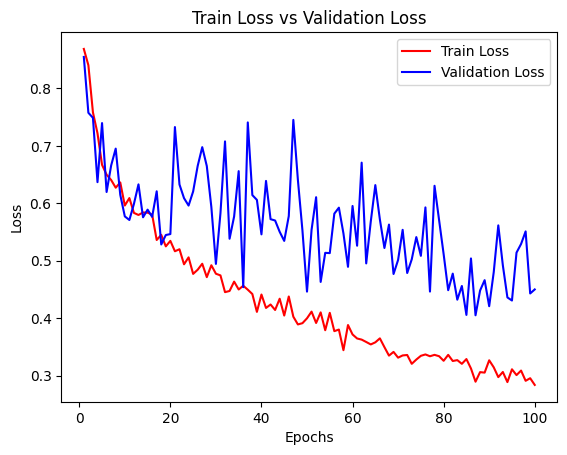

In [14]:

train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot train loss dan validation loss
plt.plot(epochs, train_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

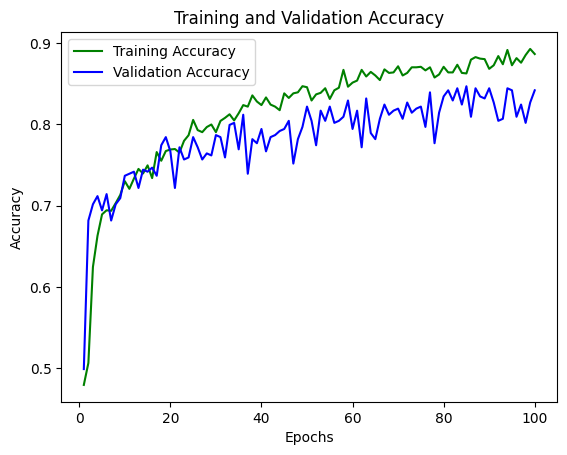

In [15]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


model_terbaik = load_model('model_tertinggi.h5')

# Fungsi untuk melakukan prediksi pada file gambar
def predict_image(file):
    img = image.load_img(file, target_size=(250, 250))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    prediction = model_terbaik.predict(img)
    predicted_class_index = np.argmax(prediction)
    predicted_probability = np.max(prediction)
    
    return predicted_class_index, predicted_probability

#file
uploaded_file = '/kaggle/input/test-data/test cocoa/healthy/healthy_231.jpg'

#prediksi pada file gambar
predicted_class_index,  predicted_probability = predict_image(uploaded_file)

if predicted_class_index == 0:
    hasil = 'Back Pod Rot'
elif predicted_class_index == 1:
    hasil = 'Healthy'
else:
    hasil = 'Pod Borer'

print("Hasil prediksi:", hasil)
print("Probabilitas prediksi:", predicted_probability)



1/1 [==============================] - 0s 96ms/step
Hasil prediksi: Healthy
Probabilitas prediksi: 0.9851419


In [16]:

from keras.models import load_model

# Memuat model terbaik
model_terbaik = load_model('model_tertinggi.h5')

# Menghitung metrik evaluasi pada data pengujian
metrics = model_terbaik.evaluate(validation_generator, steps=len(validation_generator))

# Menampilkan metrik evaluasi
for i in range(len(model_terbaik.metrics_names)):
    print("{}: {:.4f}".format(model_terbaik.metrics_names[i], metrics[i]))

20/20 [==============================] - 4s 184ms/step - loss: 0.4429 - accuracy: 0.8271
loss: 0.4429
accuracy: 0.8271
